In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings 
import missingno as msno 
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("/kaggle/input/loan-prediction-problem-dataset/train_u6lujuX_CVtuZ9i.csv")


In [4]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
print(f"Total rows : {len(df)}")
print("===========================")
print(f"Total columns : {len(df.columns)}")
print("===========================")

print(f"Shape : {df.shape}")

Total rows : 614
Total columns : 13
Shape : (614, 13)


In [7]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [9]:
df.isnull().sum()
print("=======================")
df.isnull().sum()


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: >

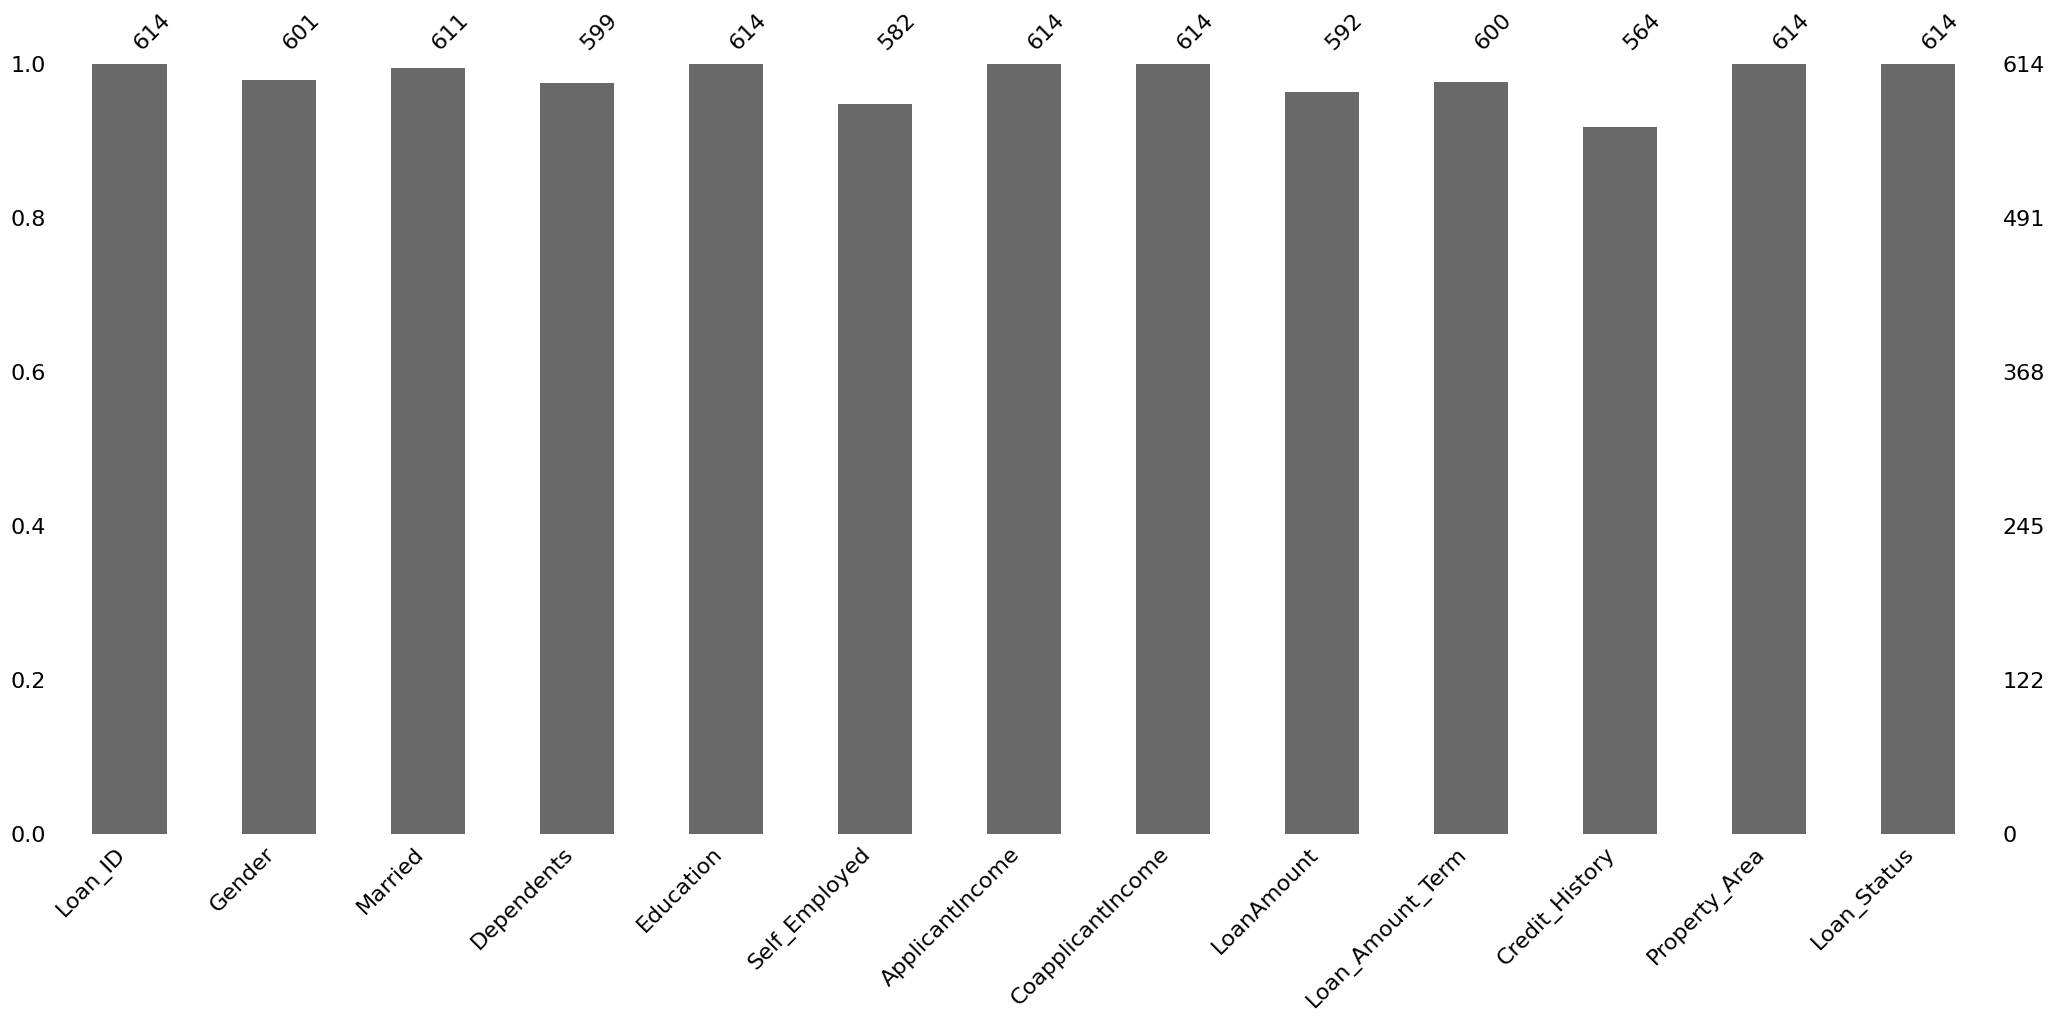

In [10]:
msno.bar(df)

<Axes: >

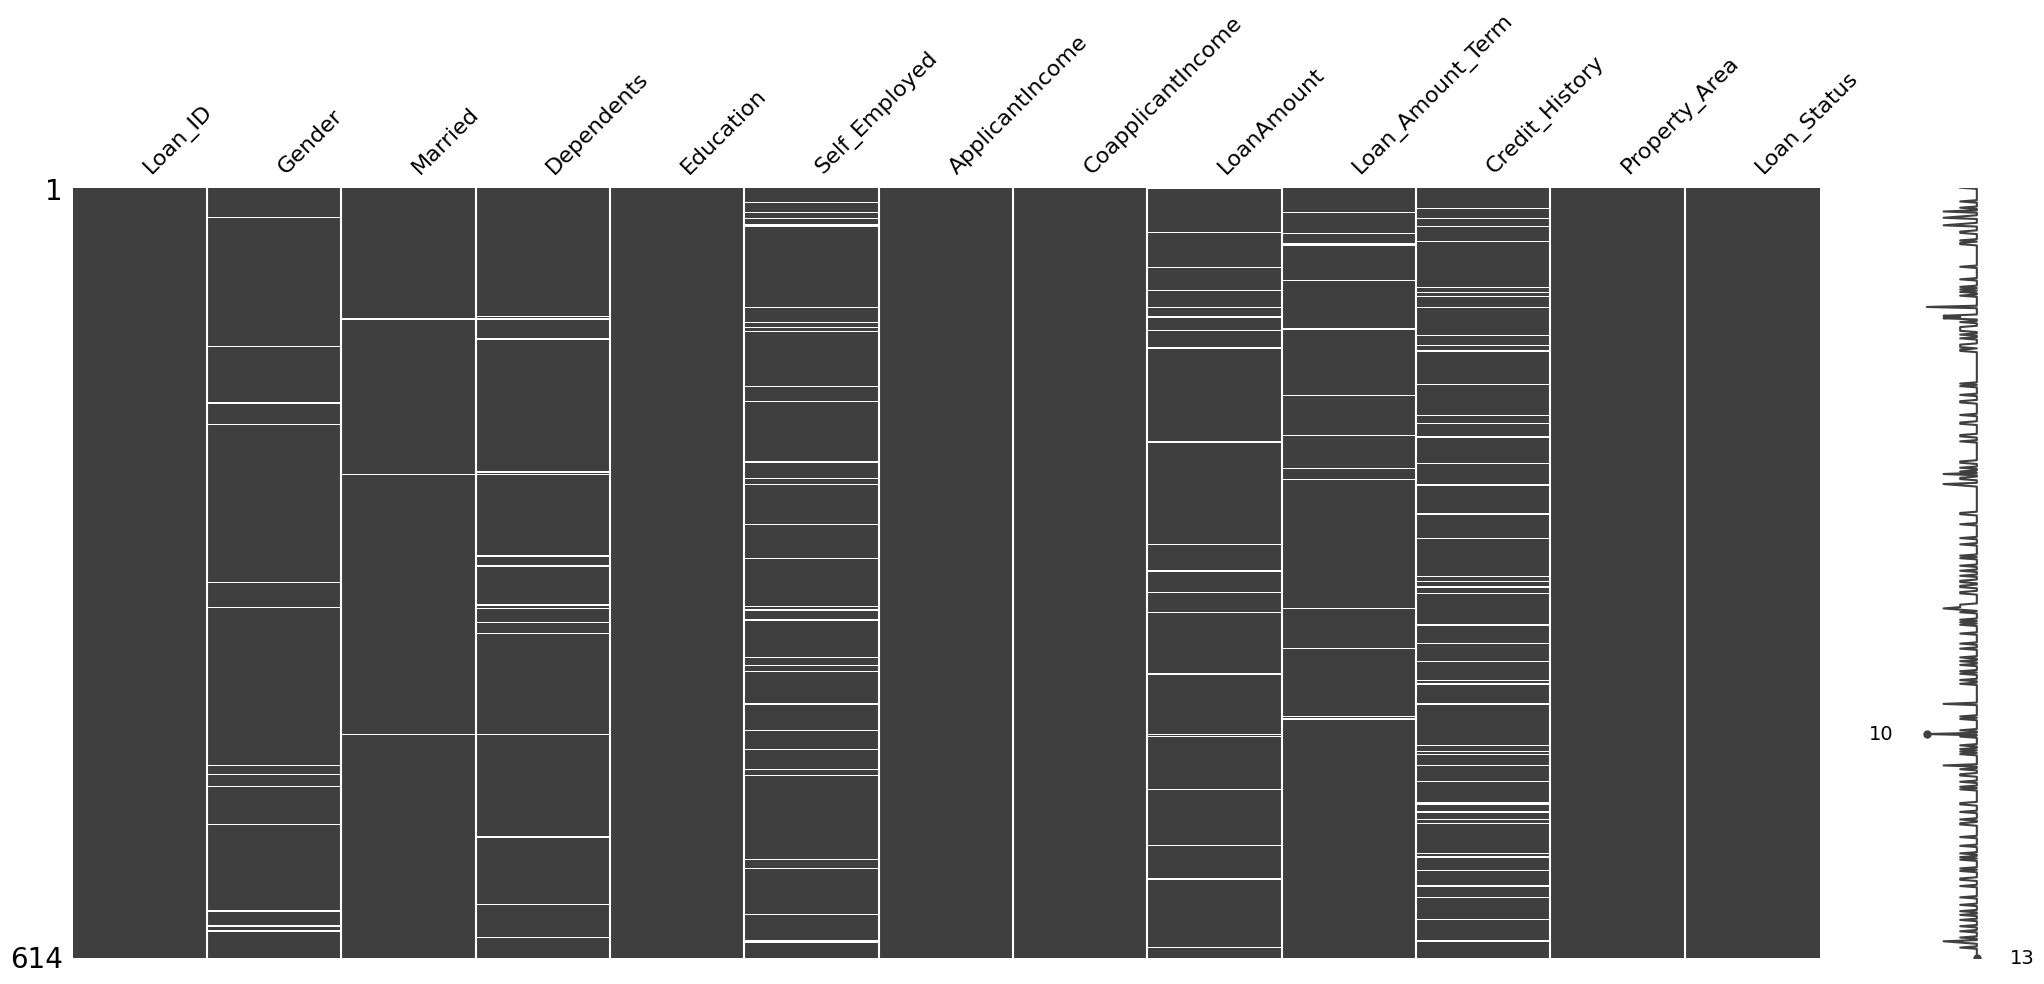

In [11]:
msno.matrix(df)

In [12]:
nulls = []
for i in df.columns : 
    if df[i].isnull().sum() > 0: 
        nulls.append(i)
nulls
# df.head()

['Gender',
 'Married',
 'Dependents',
 'Self_Employed',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [13]:
for i in nulls : 
    print("Unique values for column :" , i , df[i].unique())
    print("============================")

Unique values for column : Gender ['Male' 'Female' nan]
Unique values for column : Married ['No' 'Yes' nan]
Unique values for column : Dependents ['0' '1' '2' '3+' nan]
Unique values for column : Self_Employed ['No' 'Yes' nan]
Unique values for column : LoanAmount [ nan 128.  66. 120. 141. 267.  95. 158. 168. 349.  70. 109. 200. 114.
  17. 125. 100.  76. 133. 115. 104. 315. 116. 112. 151. 191. 122. 110.
  35. 201.  74. 106. 320. 144. 184.  80.  47.  75. 134.  96.  88.  44.
 286.  97. 135. 180.  99. 165. 258. 126. 312. 136. 172.  81. 187. 113.
 176. 130. 111. 167. 265.  50. 210. 175. 131. 188.  25. 137. 160. 225.
 216.  94. 139. 152. 118. 185. 154.  85. 259. 194.  93. 370. 182. 650.
 102. 290.  84. 242. 129.  30. 244. 600. 255.  98. 275. 121.  63. 700.
  87. 101. 495.  67.  73. 260. 108.  58.  48. 164. 170.  83.  90. 166.
 124.  55.  59. 127. 214. 240.  72.  60. 138.  42. 280. 140. 155. 123.
 279. 192. 304. 330. 150. 207. 436.  78.  54.  89. 143. 105. 132. 480.
  56. 159. 300. 376. 117.

In [14]:
df['LoanAmount'].fillna(df['LoanAmount'].median() , inplace = True)
df['Gender'].fillna(df['Gender'].mode()[0] , inplace = True)
df['Married'].fillna(df['Married'].mode()[0] , inplace = True)
df['Dependents'].fillna(df['Dependents'].mode()[0] , inplace = True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0] , inplace = True)

df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)



df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0] , inplace = True)

In [15]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [16]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


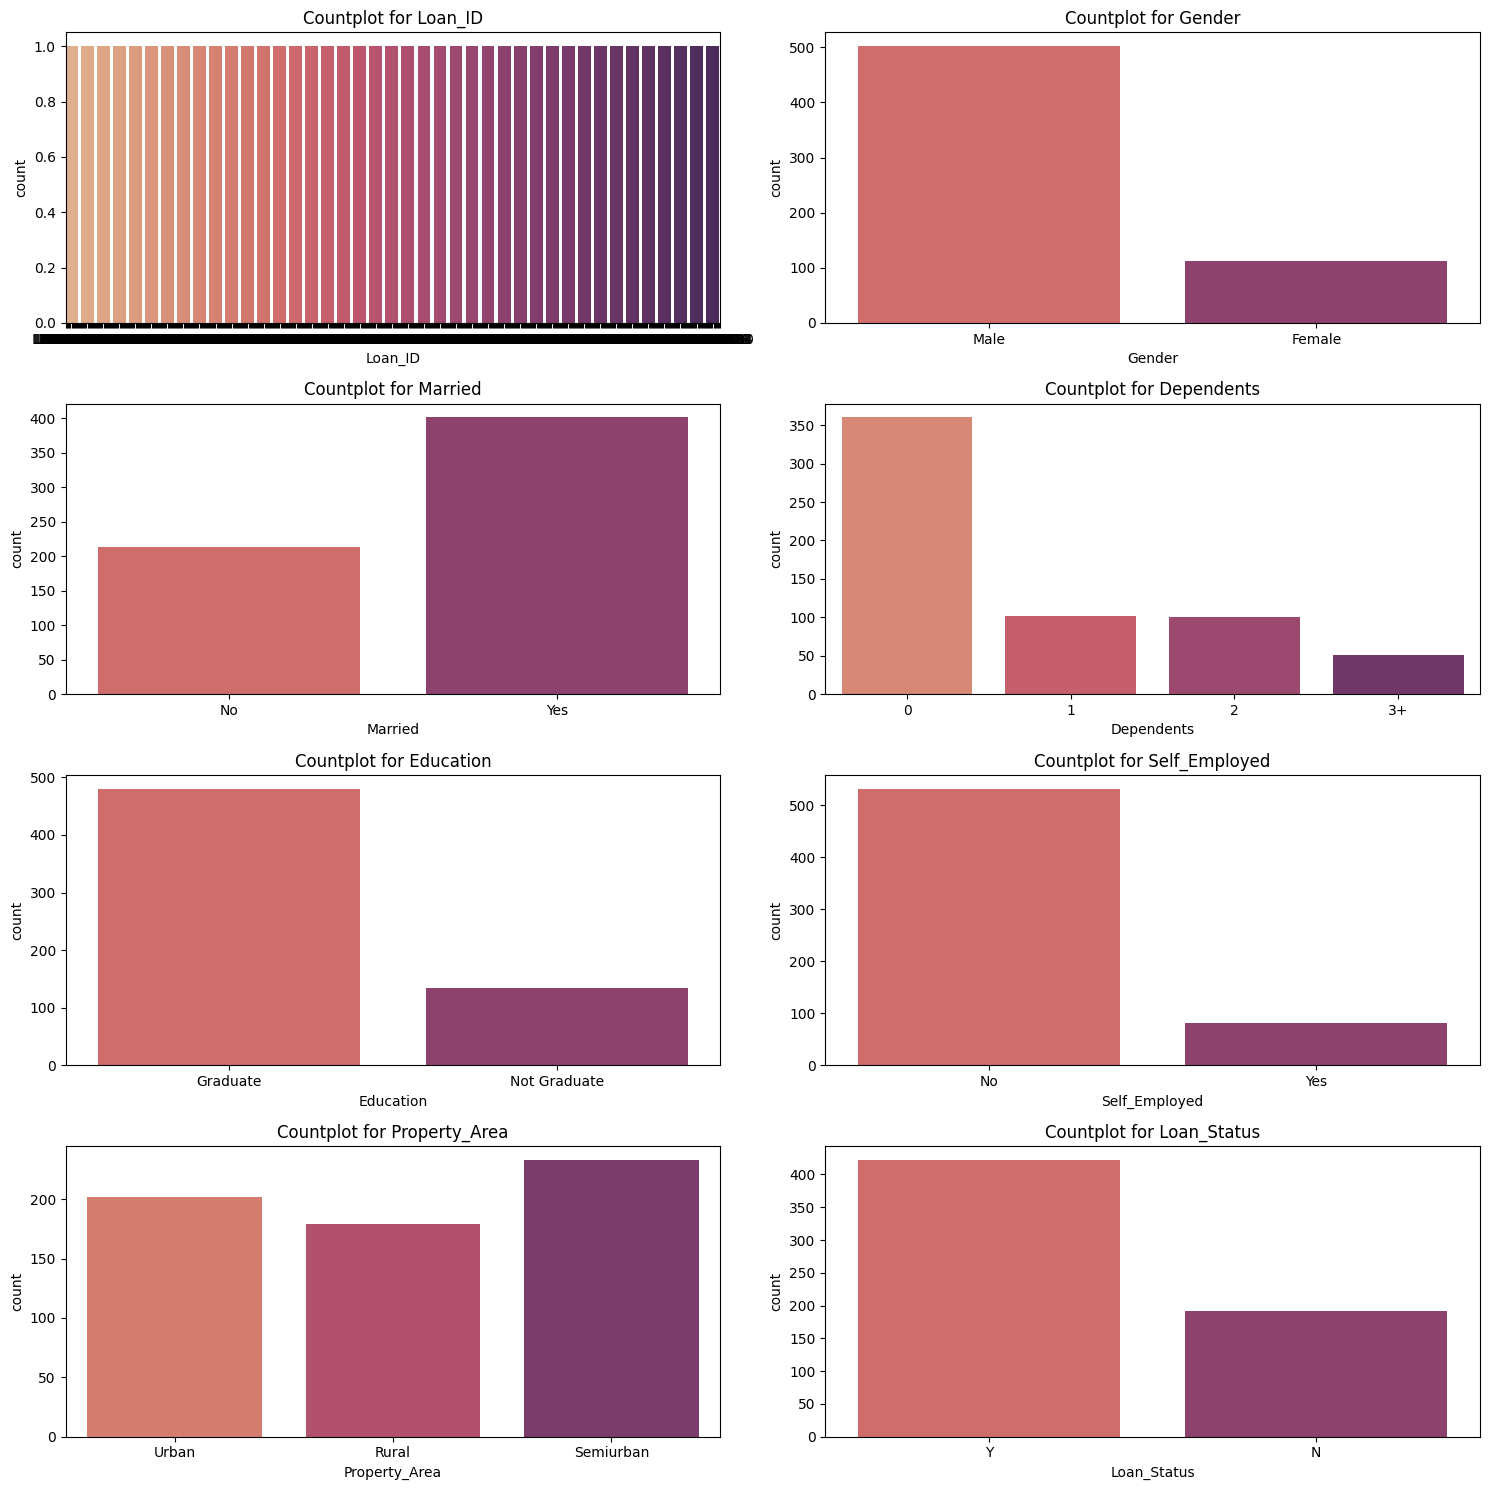

In [17]:
n_cols = 2
n_rows = 4

fig , axes = plt.subplots(n_rows , n_cols , figsize = (15 ,15))
axes = axes.flatten()

for idx , cols in enumerate(df.select_dtypes(include = "object")):
    sns.countplot(x = cols , data = df , palette = 'flare' , ax = axes[idx])
    axes[idx].set_title(f"Countplot for {cols}")
plt.tight_layout()
plt.show()

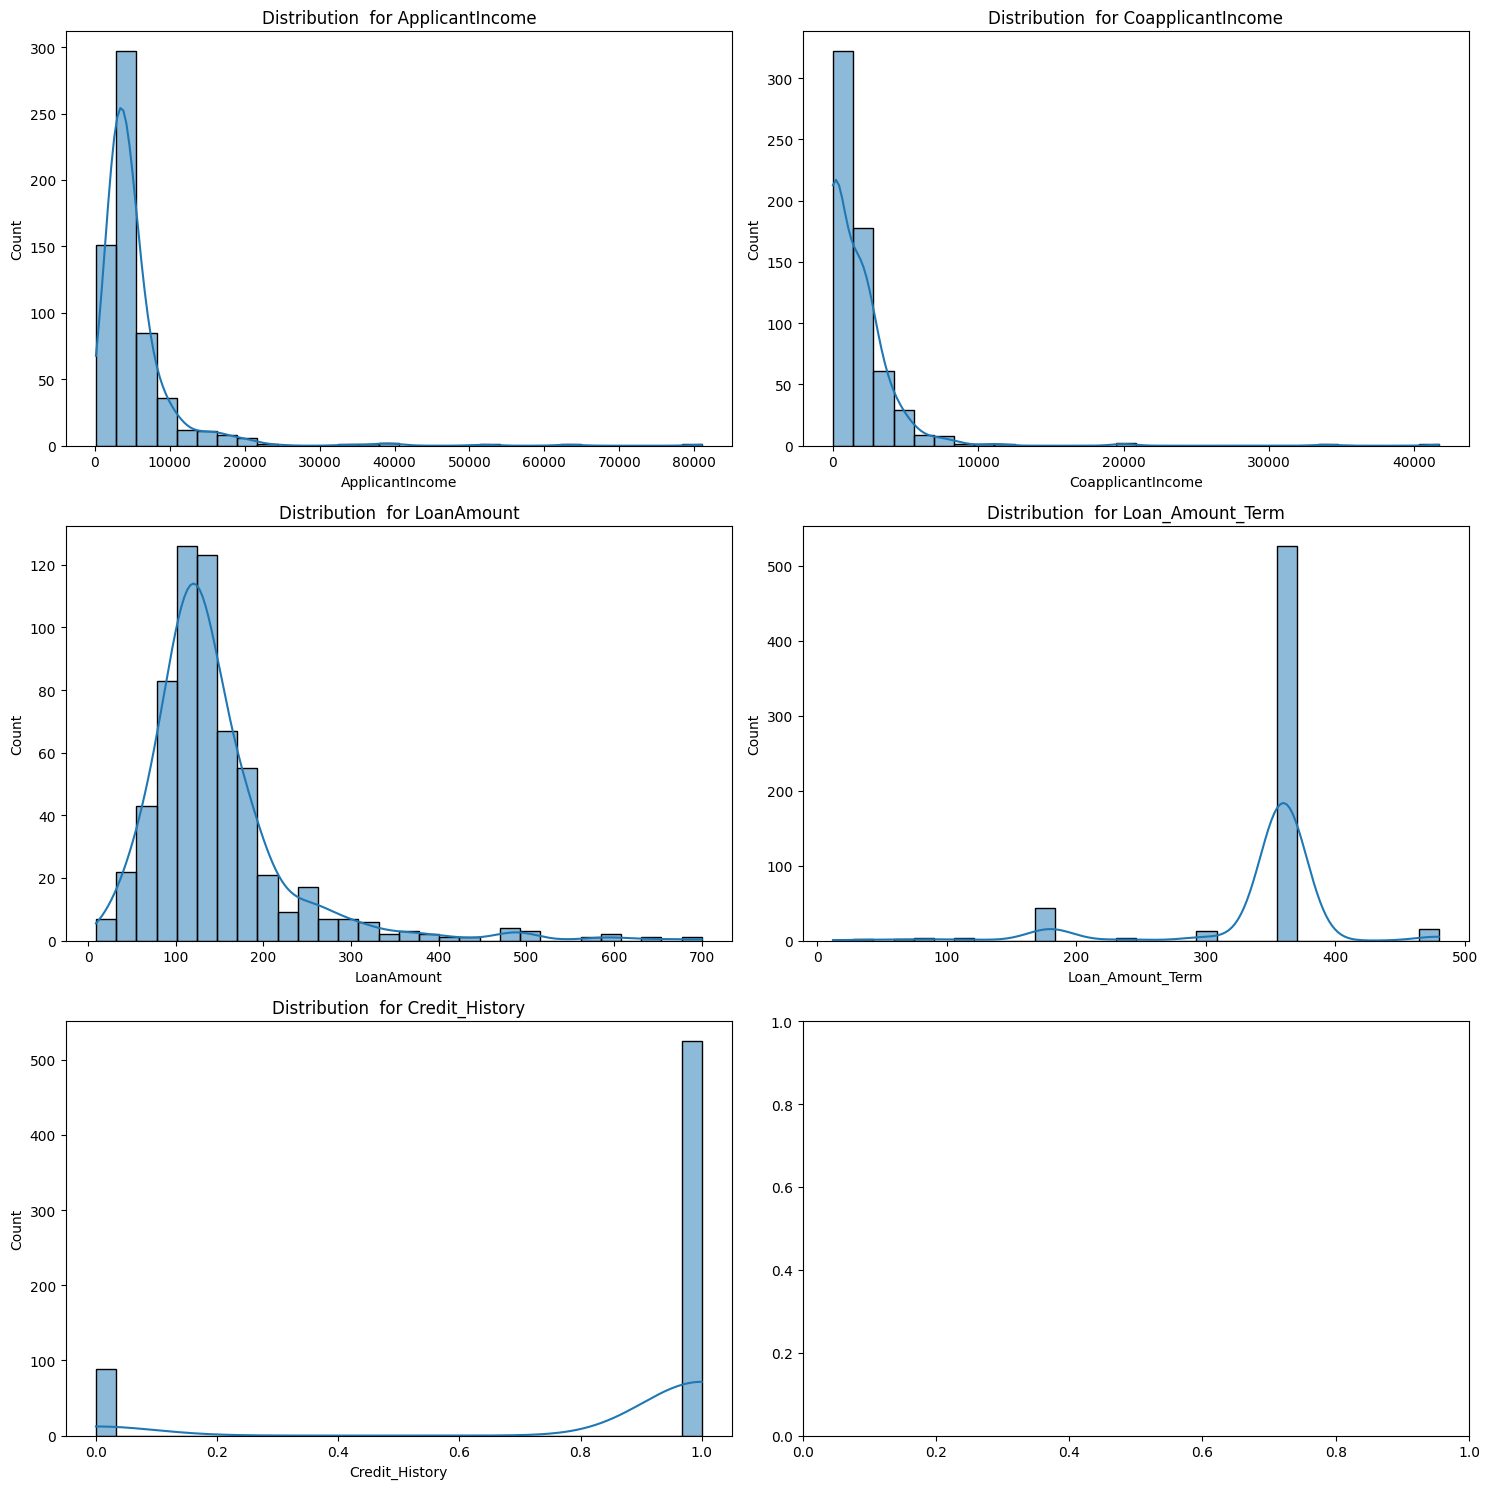

In [18]:
n_cols = 2
n_rows = 3

fig , axes = plt.subplots(n_rows , n_cols , figsize = (15 ,15))
axes = axes.flatten()

for idx , cols in enumerate(df.select_dtypes(include = "number")):
    sns.histplot(x = cols ,bins = 30 ,  data = df ,kde = True , palette = 'flare' , ax = axes[idx])
    axes[idx].set_title(f"Distribution  for {cols}")
plt.tight_layout()
plt.show()

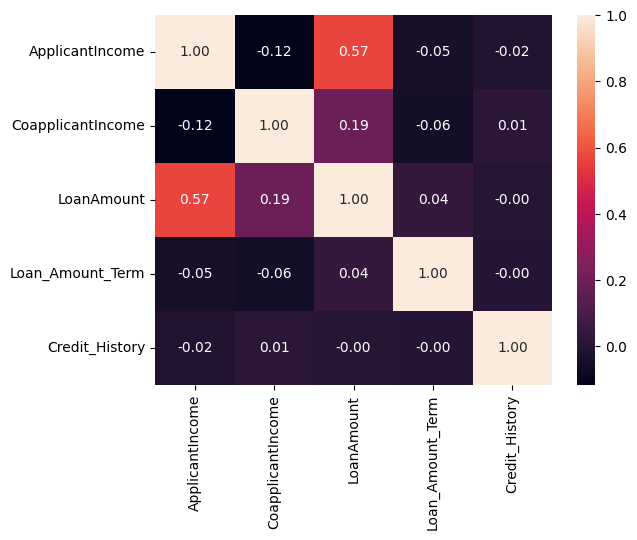

In [19]:
sns.heatmap(df.select_dtypes(include = 'number').corr() , annot = True , fmt = ".2f")
plt.show()

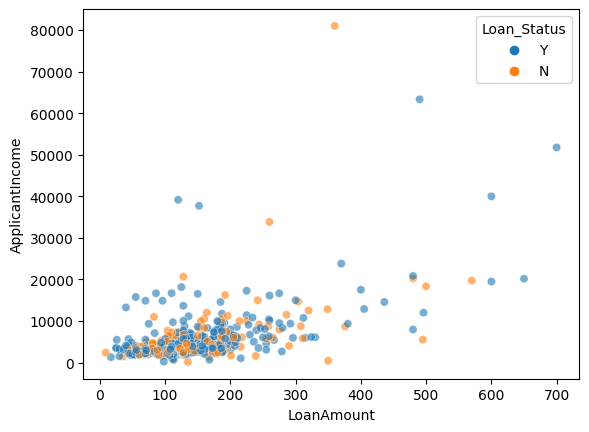

In [20]:
sns.scatterplot(x='LoanAmount', y='ApplicantIncome', hue='Loan_Status', alpha=0.6 ,   data=df)
plt.show()


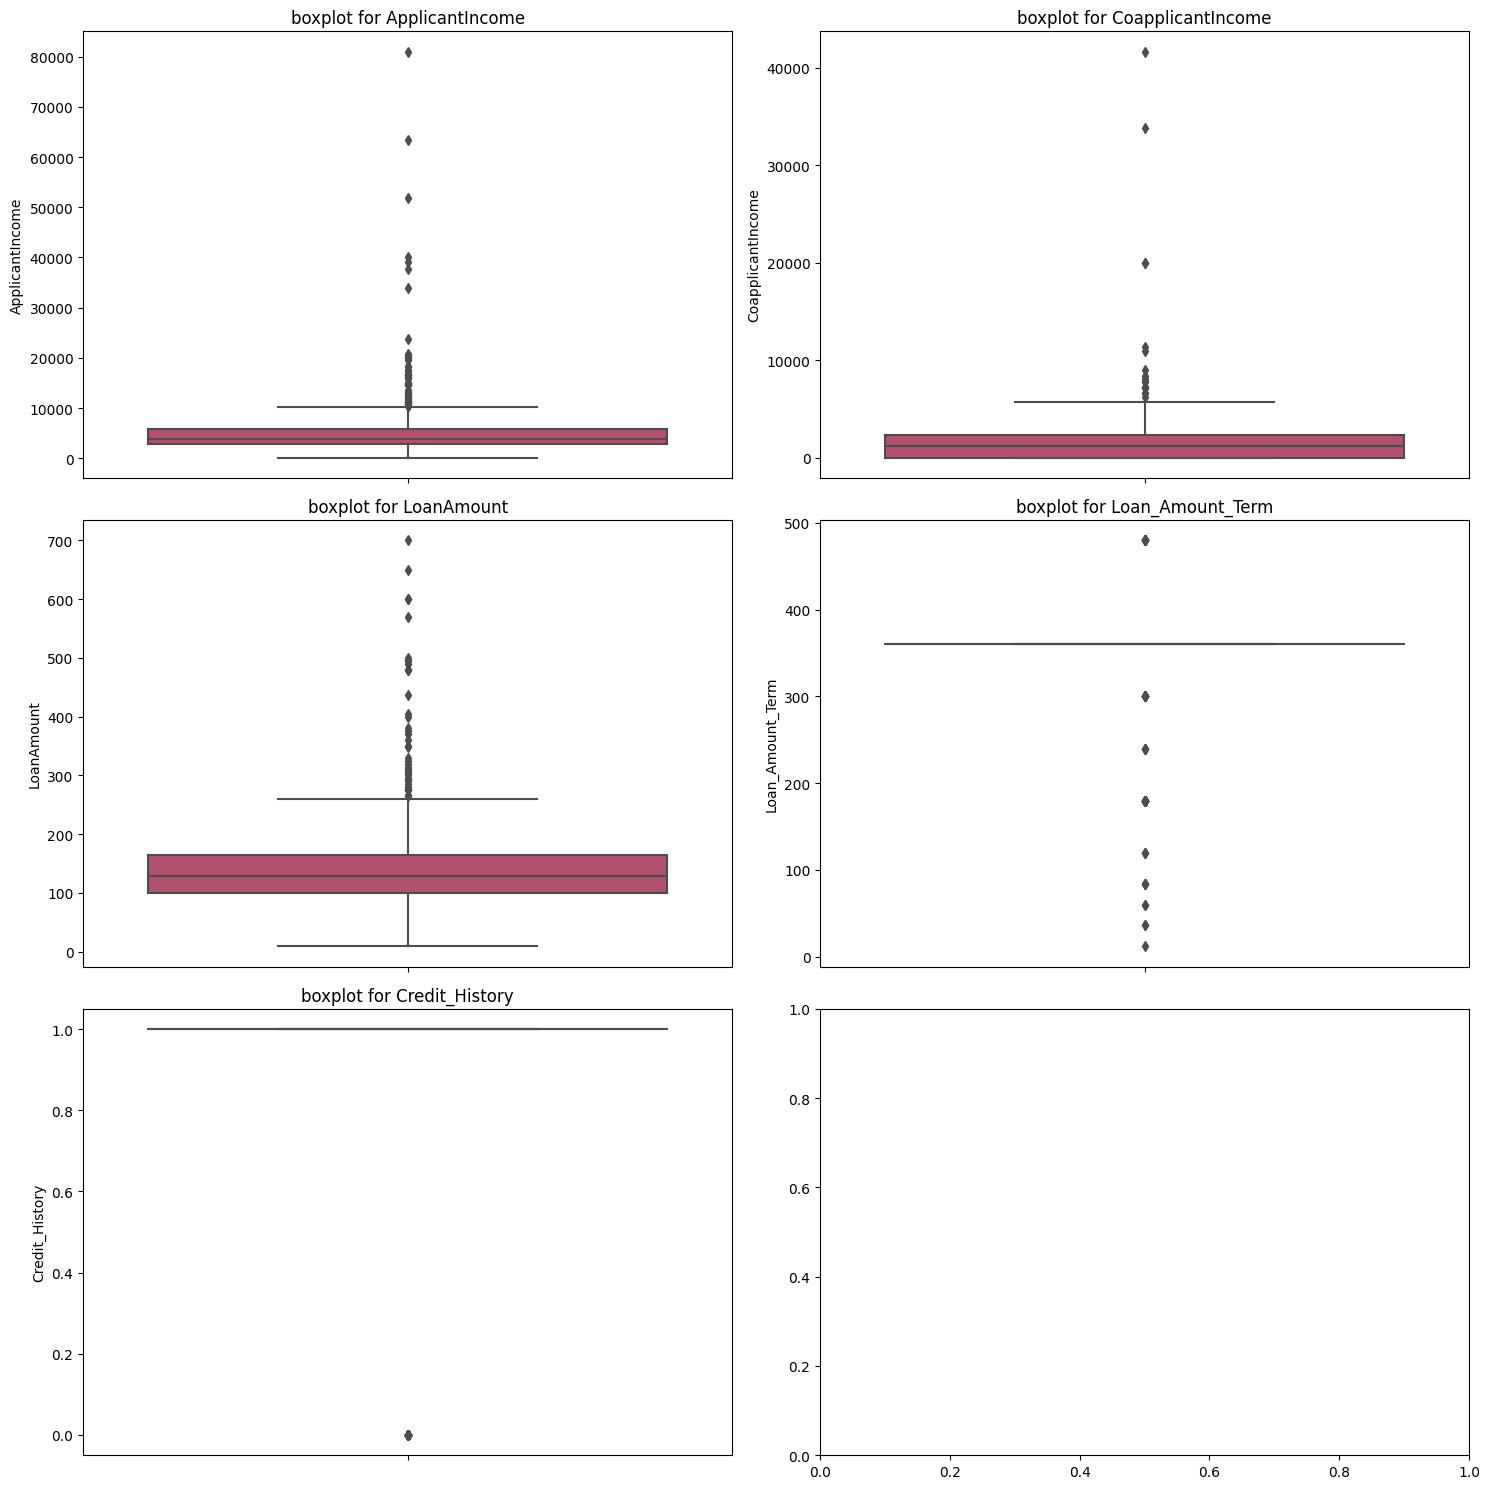

In [21]:
n_cols = 2
n_rows = 3

fig , axes = plt.subplots(n_rows , n_cols , figsize = (15 ,15))
axes = axes.flatten()

for idx , cols in enumerate(df.select_dtypes(include = "number")):
    sns.boxplot(y= cols , data = df , palette = 'flare' , ax = axes[idx])
    axes[idx].set_title(f"boxplot for {cols}")
plt.tight_layout()
plt.show()

In [22]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [23]:
from sklearn.preprocessing import LabelEncoder


label = LabelEncoder()


df['Gender'] = df['Gender'].map({"Male": 1, "Female": 0})
df['Married'] = df['Married'].map({"Yes": 1, "No": 0})
df['Education'] = df['Education'].map({"Graduate": 1, "Not Graduate": 0})
df['Self_Employed'] = df['Self_Employed'].map({"Yes": 1, "No": 0})
df['Loan_Status'] = df['Loan_Status'].map({"Y": 1, "N": 0})


#Using Label Encoder 

df['Dependents'] = label.fit_transform(df['Dependents'])
df['Property_Area'] = label.fit_transform(df['Property_Area'])

In [24]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,2,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1


In [30]:
X = df.iloc[: , 1 :12]
y = df['Loan_Status']

In [33]:
from sklearn.model_selection import train_test_split 

X_train , X_test , y_train , y_test = train_test_split(X , y , random_state = 32 , test_size = 0.3)

In [36]:
from sklearn.preprocessing import RobustScaler 

scaler = RobustScaler()

# Fit scaler only on training data
X_train[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']] = scaler.fit_transform(
    X_train[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']]
)

# Use the same scaler (fitted on train) to transform test data
X_test[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']] = scaler.transform(
    X_test[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']]
)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [37]:


# If you have XGBoost installed
from xgboost import XGBClassifier

# Your train-test data: X_train, X_test, y_train, y_test

# 1. Define classifiers and their parameter grids
models = {
    'RandomForest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'n_estimators': [50, 100],
            'max_depth': [None, 10, 20]
        }
    },
    'XGBoost': {
        'model': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
        'params': {
            'n_estimators': [50, 100],
            'max_depth': [3, 6]
        }
    },
    'LogisticRegression': {
        'model': LogisticRegression(max_iter=1000, random_state=42),
        'params': {
            'C': [0.1, 1, 10],
            'solver': ['lbfgs']
        }
    },
    'SVM': {
        'model': SVC(random_state=42),
        'params': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf']
        }
    }
}

# 2. Loop through each model and perform GridSearchCV
for name, mp in models.items():
    print(f"Training {name}...")
    clf = GridSearchCV(mp['model'], mp['params'], cv=5, scoring='accuracy', n_jobs=-1)
    clf.fit(X_train, y_train)
    
    print(f"Best params for {name}: {clf.best_params_}")
    
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Test accuracy for {name}: {acc:.4f}\n")


Training RandomForest...
Best params for RandomForest: {'max_depth': 10, 'n_estimators': 50}
Test accuracy for RandomForest: 0.8324

Training XGBoost...
Best params for XGBoost: {'max_depth': 3, 'n_estimators': 50}
Test accuracy for XGBoost: 0.8270

Training LogisticRegression...
Best params for LogisticRegression: {'C': 1, 'solver': 'lbfgs'}
Test accuracy for LogisticRegression: 0.8378

Training SVM...
Best params for SVM: {'C': 0.1, 'kernel': 'linear'}
Test accuracy for SVM: 0.8324

